In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 1 - Input

In [2]:
train = pd.read_csv('../input/mobile-price-classification/train.csv')

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# 2 - Exploratory analysis

In [4]:
# The dataset don't have missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

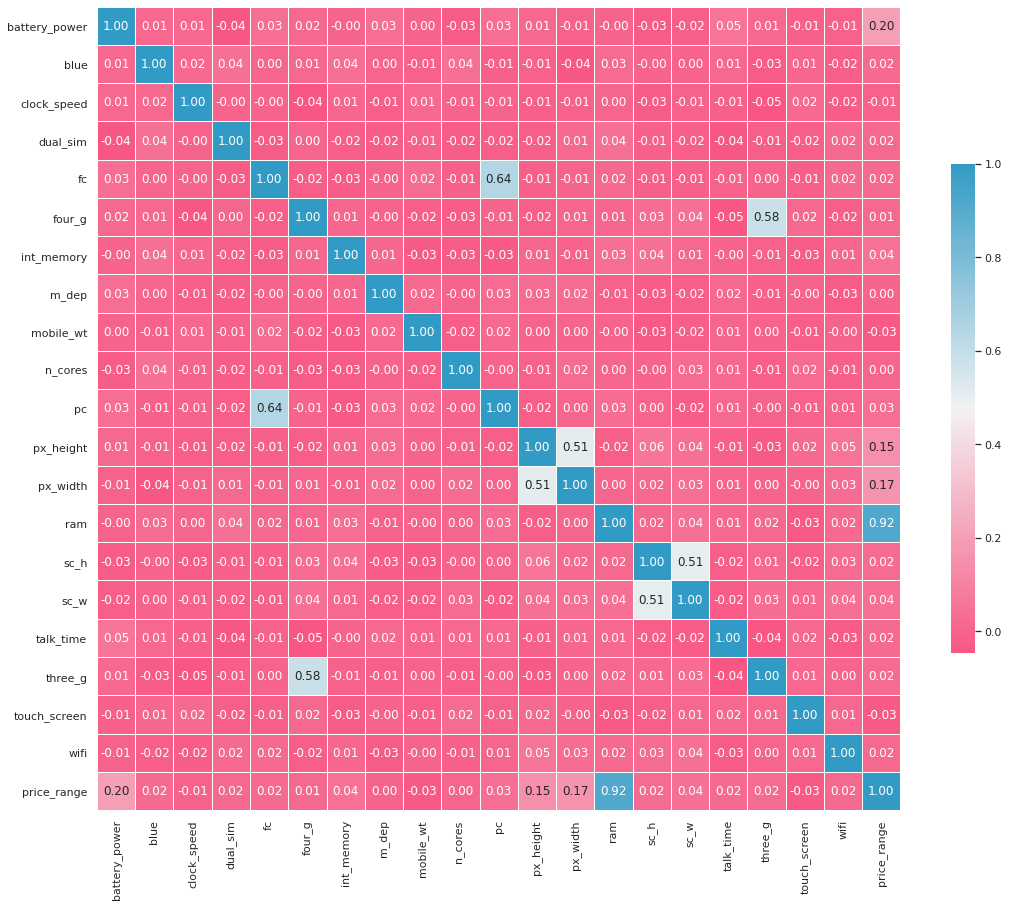

In [5]:
# We can see that the ram variable has a strong positive correlation
plt.figure(figsize=(18,15))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(train.corr(), cmap=cmap, cbar_kws={'shrink': .6}, square=True, annot=True, fmt='.2f', linewidths=.8)
plt.show()

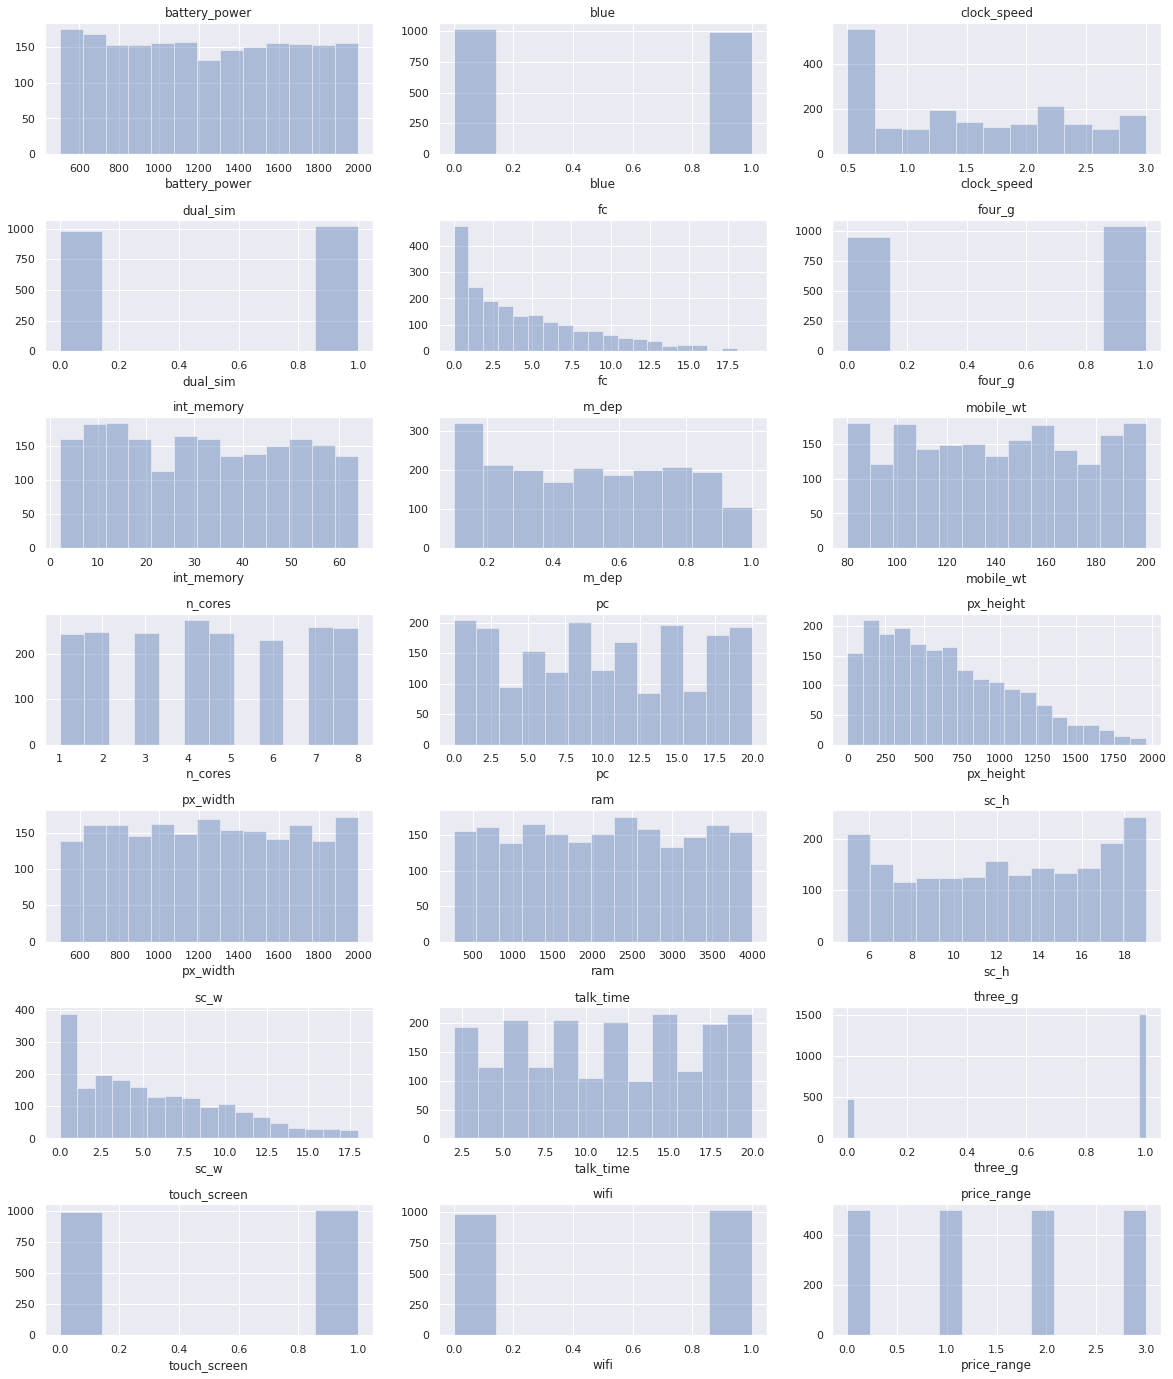

In [6]:
columns = train.columns
plt.subplots(figsize=(20,35))
length = len(columns)

for i, j in zip(columns, range(length)):
    plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.distplot(train[i], kde=False)
    plt.title(i)

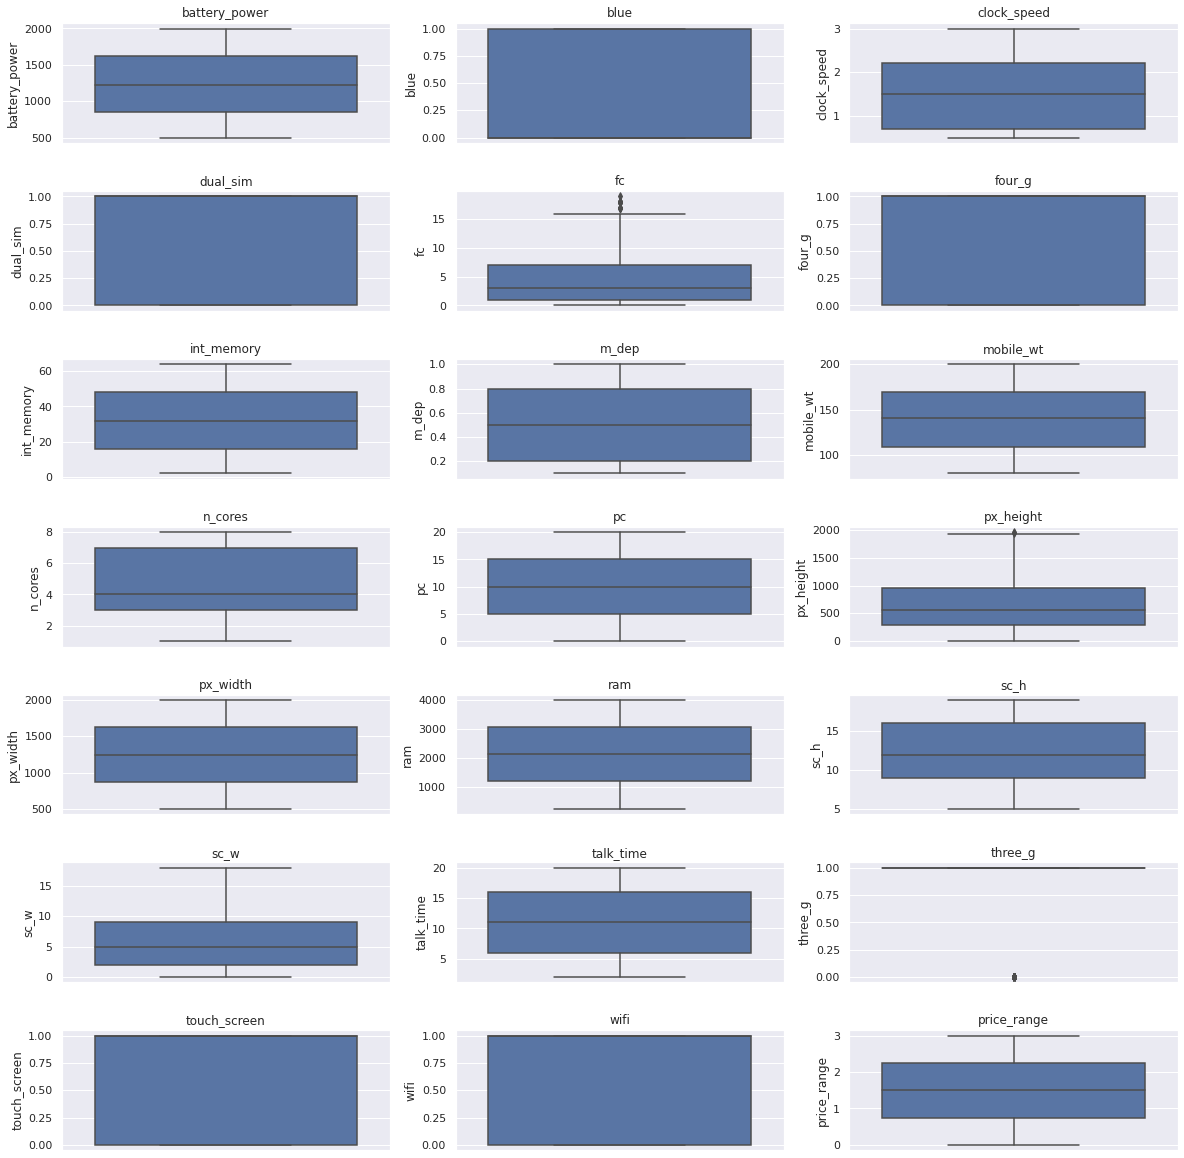

In [7]:
plt.subplots(figsize=(20,30))
for i, j in zip(columns, range(length)):
    plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.4)
    sns.boxplot(y=train[i])
    plt.title(i)

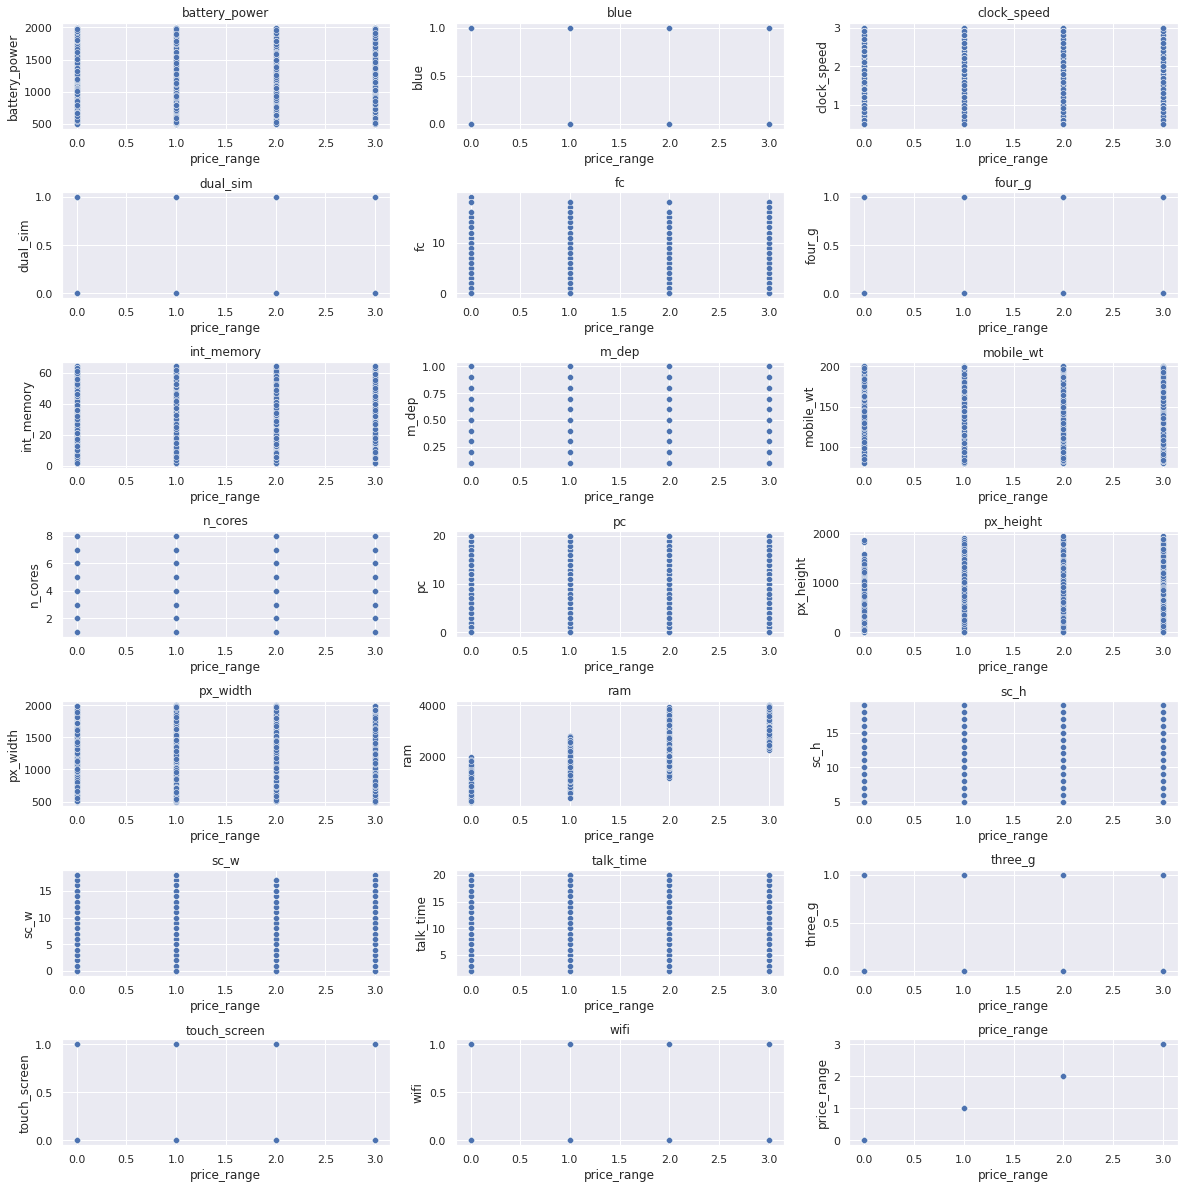

In [8]:
plt.subplots(figsize=(20,30))
for i, j in zip(columns, range(length)):
    plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.6)
    sns.scatterplot(x=train['price_range'],y=train[i])
    plt.title(i)

In [9]:
x = train.drop('price_range', axis=1)
y = train['price_range']

# Normalization
x = x/255

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [11]:
model = []
model.append(('Decision Tree Classifier',DecisionTreeClassifier()))
model.append(('ExtraTrees Classifier',ExtraTreesClassifier()))
model.append(('Gradient Boosting Classifier',GradientBoostingClassifier()))
model.append(('Random Forest Classifier',RandomForestClassifier()))

In [12]:
for n, m in model:
    m.fit(x_train, y_train)
    prev = m.predict(x_test)
    acc = accuracy_score(y_test, prev)
    print(n, acc)

Decision Tree Classifier 0.815
ExtraTrees Classifier 0.8475
Gradient Boosting Classifier 0.895
Random Forest Classifier 0.845


In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
pre = lr.predict(x_test)
acc = accuracy_score(y_test, pre)
print(acc*100)

92.0
